# Tropical Cyclone
---

An the end of February 2025, the tropical cyclone Honde affected the southern coast of Madagascar. It caused very heavy rainfall and strong winds. <br>

This example shows analysis of the selected parameter:
- [`tc`](https://codes.ecmwf.int/grib/param-db/129) tropical cyclone trajectory of the **IFS** datasets on 28 February at 00 UTC in Madagascar (22.95° S, 44.1° E).

## 1. Set Up Your Environment and Find ECMWF Open Data
Open data will be downloaded from a publicly available [Amazon S3 Bucket](../datadownload/find-data.md). First, the following Python libraries need to be installed in the current Jupyter kernel:
- `ecmwf-opendata` to download data,
- `earthkit` to analyse and plot the data,
- `matplotlib` to create visualizations, and
- `cartopy` for cartographic visualizations.

:::{seealso}
More detailed information about how to install Python packages is available on the [Retrieve Data](../datadownload/data-download.ipynb) website.
:::
If the packages are not installed yet, uncomment the code below and run it.

In [ ]:
# !pip3 install earthkit ecmwf-opendata matplotlib cartopy

In [35]:
from ecmwf.opendata import Client
import earthkit.data as ekd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

(content:references:listParam_tc)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.

In [36]:
PARAM_SFC = ["tc"]
LEVELTYPE = "sfc"

DATES = [20250228, 20250301]
TIME = 0
STEPS = 240
STREAM = "oper"
TYPE = "tf"
MODEL = "ifs"

### Get the data using the ECMWF Open Data API

In [51]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. Tropical cyclone tracks and pressure reduced to mean sea level

When using the `ls()` method, metadata from the header section of the BUFR we downloaded will be displayed.

In [37]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select AIFS model data on 28 February 2025
ds = ekd.from_source("file", list_of_files[0])
ds.ls()

,edition,type,subtype,c,mv,lv,subsets,compr,typicalDate,typicalTime,ident,lat,lon
0,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
1,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
2,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
3,4,7,32,98,35,0,1,0,20250228,000000,None,None,None


:::{tip}
To learn more about how to extract BUFR data into a Pandas dataframe, visit [BUFR: using SYNOP data](https://earthkit-data.readthedocs.io/en/latest/examples/bufr_synop.html) website.
:::

In [38]:
df = ds.to_pandas(columns=["stormIdentifier", "latitude", "longitude", "pressureReducedToMeanSeaLevel"])
df

,stormIdentifier,latitude,longitude,pressureReducedToMeanSeaLevel
0,10S,-19.9,55.4,97700.0
1,10S,-21.6,55.3,99200.0
2,10S,-22.8,54.8,99100.0
3,10S,-24.2,54.8,99500.0
4,10S,-25.9,54.8,99100.0
...,...,...,...,...
103,21P,-20.4,174.1,100700.0
104,21P,-20.7,173.6,100600.0
105,21P,-20.7,174.4,100700.0
106,21P,-20.4,173.7,100600.0


The column `stormIdentifier` contains ID numbers of different storms in the BUFR file.

In [39]:
df["stormIdentifier"].unique()

array(['10S', '11S', '18P', '21P'], dtype=object)

In this case study we will analyse the tropical cyclone Honde, thus we will select `stormIdentifier=11S`.

In [40]:
tc_h = df[df["stormIdentifier"] == '11S']
tc_h.head()

,stormIdentifier,latitude,longitude,pressureReducedToMeanSeaLevel
13,11S,-25.5,43.1,96900.0
14,11S,-25.6,43.8,97100.0
15,11S,-26.3,44.1,97100.0
16,11S,-26.4,44.2,97000.0
17,11S,-26.6,44.6,97000.0


We will plot pressure reduced to mean sea level data in hPa, therefore we need to divide them by 100.

In [41]:
pmsl = tc_h["pressureReducedToMeanSeaLevel"] / 100
pmsl

13     969.0
14     971.0
15     971.0
16     970.0
17     970.0
18     973.0
19     973.0
20     975.0
21     976.0
22     978.0
23     978.0
24     980.0
25     980.0
26     980.0
27     978.0
28     977.0
29     975.0
30     976.0
31     973.0
32     975.0
33     974.0
34     980.0
35     981.0
36     984.0
37     985.0
38     989.0
39     991.0
40     996.0
41     998.0
42    1003.0
43    1005.0
44    1009.0
Name: pressureReducedToMeanSeaLevel, dtype: float64

## 3. 10 metre wind speed
Here we will retrieve data from the IFS Ensemble.<br>
The input values can be set [here](#content:references:listParam_tc).

In [52]:
PARAM_SFC = ["tc"]
LEVELTYPE = "sfc"

DATES = [20250228]
TIME = 0
STEPS = 240
STREAM = "enfo"
TYPE = "tf"
MODEL = "ifs"

In [58]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select AIFS model data on 28 February 2025
ds_ens = ekd.from_source("file", list_of_files)
ds_ens

BUFRReader(ifs_tc_sfc_20250228.grib2)

In [59]:
df_ens = ds_ens.to_pandas(columns=["stormIdentifier", "ensembleMemberNumber", "latitude", "longitude", "windSpeedAt10M"])
df_ens

,stormIdentifier,ensembleMemberNumber,latitude,longitude,windSpeedAt10M
0,10S,1,-19.7,55.1,60.2
1,10S,1,-21.4,55.2,32.4
2,10S,1,-22.7,54.8,22.6
3,10S,1,-24.6,54.6,22.1
4,10S,1,-26.0,54.4,27.3
...,...,...,...,...,...
37033,77P,48,NaN,NaN,NaN
37034,77P,48,NaN,NaN,NaN
37035,77P,48,-19.2,-166.6,11.3
37036,77P,48,NaN,NaN,NaN


:::{note}
While we dowloaded the data from the IFS Ensemble, an additional column `ensembleMemberNumber` was added to the Pandas DataFrame.
:::

After selecting `stormIdentifier=11S`, we will remove the column `stormIdentifier` from our Pandas DataFrame.

In [60]:
tc_h_ens = df_ens[df_ens["stormIdentifier"] == '11S']
tc_h_ens = tc_h_ens.drop('stormIdentifier', axis=1)
tc_h_ens

,ensembleMemberNumber,latitude,longitude,windSpeedAt10M
884,1,-25.8,43.9,46.3
885,1,-25.5,44.2,41.2
886,1,-26.6,44.4,39.1
887,1,-25.8,44.9,36.5
888,1,-26.5,45.2,37.0
...,...,...,...,...
3011,52,NaN,NaN,NaN
3012,52,NaN,NaN,NaN
3013,52,NaN,NaN,NaN
3014,52,NaN,NaN,NaN


First we will sort the data according to their ensemble member numbers and then we will calculate the mean of them.

:::{important}
When removing missing values, bear in mind that by default (`axis=0`) rows which contain missing values will be dropped. If we set `axis=1`, columns with missing values will be dropped.
:::

In [61]:
tc_h_ens = tc_h_ens.dropna(axis=0)
tc_h_ens = tc_h_ens.sort_values('ensembleMemberNumber')
tc_h_ens = tc_h_ens.drop('ensembleMemberNumber', axis=1)
mean_ens = tc_h_ens.groupby(['latitude', 'longitude'], as_index=False, dropna=True).mean()
mean_ens

,latitude,longitude,windSpeedAt10M
0,-46.4,63.1,14.90
1,-45.8,72.4,23.70
2,-45.2,69.0,14.40
3,-44.7,64.5,17.00
4,-44.6,58.6,22.60
...,...,...,...
1357,-24.4,43.0,34.00
1358,-24.3,43.5,23.20
1359,-24.2,43.5,28.05
1360,-24.0,42.8,28.80


## 4. Data visualisation

The plots below show the tropical cyclone track for TC Honde and the analysis of pressure reduced to mean sea level on 28 February 2025.

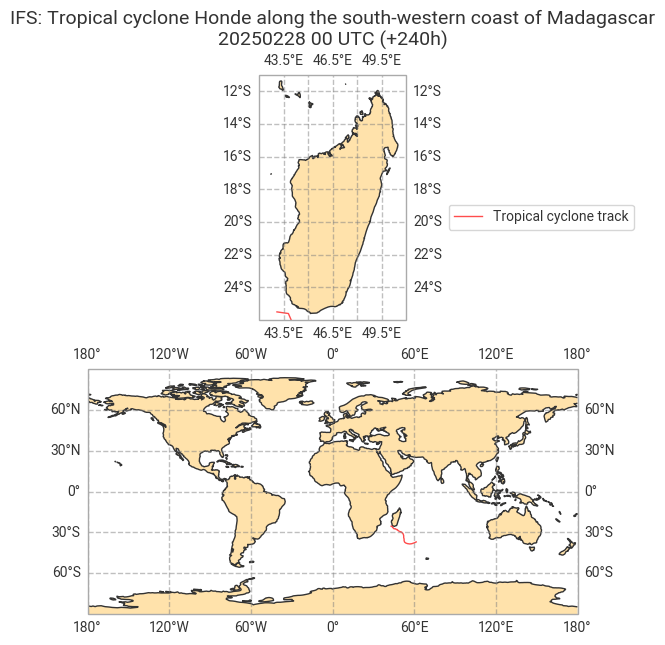

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': ccrs.PlateCarree()})

ax1.plot(tc_h["longitude"], tc_h["latitude"],
         color='red',
         label="Tropical cyclone track",
         linewidth=1,
         alpha=0.7,
         transform = ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax1.set_title("IFS: Tropical cyclone Honde along the south-western coast of Madagascar\n"
              f"{DATES[0]} 00 UTC (+{STEPS}h)",
              fontsize=14)
ax1.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax1.coastlines(color="#333333")
ax1.set_extent([42, 51, -26, -11], crs=ccrs.PlateCarree())
ax1.legend(loc="best", bbox_to_anchor=(2.1, 0., 0.5, 0.5))

ax2.plot(tc_h["longitude"], tc_h["latitude"],
         color='red',
         linewidth=1,
         alpha=0.7,
         transform = ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax2.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax2.coastlines(color="#333333")
ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

fig.savefig(f"./plots/{''.join(PARAM_SFC)}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png", dpi=200, bbox_inches='tight')

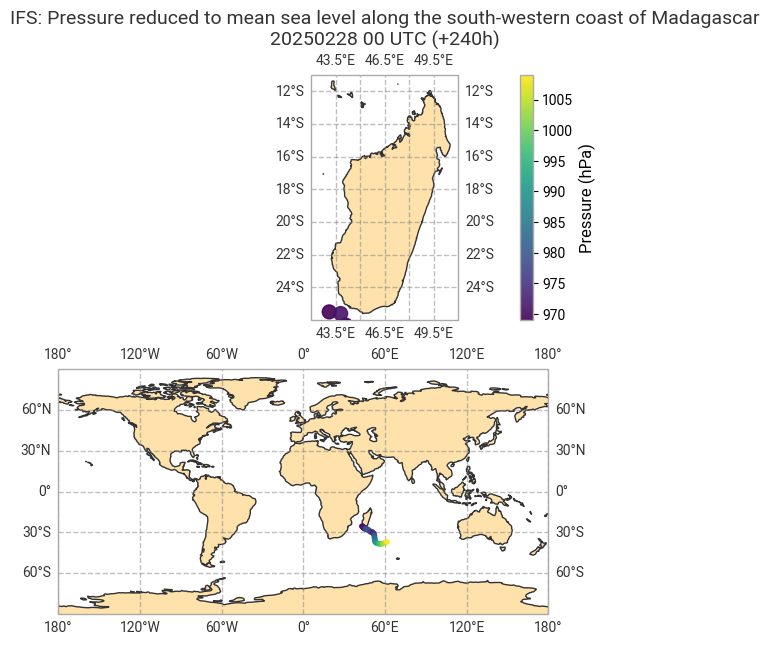

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': ccrs.PlateCarree()})

pressure = ax1.scatter(tc_h.longitude, tc_h.latitude,
            s=100,
            c=pmsl,
            marker='o',
            cmap='viridis',
            alpha=0.9,
            edgecolors='face',
            transform = ccrs.PlateCarree(),
            zorder=10)
cbar = fig.colorbar(pressure, ax=ax1, pad=0.1)
cbar.set_label('Pressure (hPa)', fontsize=12)
ax1.set_title("IFS: Pressure reduced to mean sea level along the south-western coast of Madagascar\n"
              f"{DATES[0]} 00 UTC (+{STEPS}h)",
              fontsize=14)
ax1.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax1.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax1.coastlines(color="#333333")
ax1.set_extent([42, 51, -26, -11], crs=ccrs.PlateCarree())

ax2.scatter(tc_h["longitude"], tc_h["latitude"],
            s=10,
            c=pmsl,
            marker='o',
            cmap='viridis',
            alpha=0.9,
            edgecolors='face',
            transform = ccrs.PlateCarree(),
            zorder=10)
ax2.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax2.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax2.coastlines(color="#333333")
ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

fig.savefig(f"./plots/pmsl_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png", dpi=200, bbox_inches='tight')

The plot below shows the analysis of 10 metre wind speed of the tropical cyclone Honde on 28 February 2025.

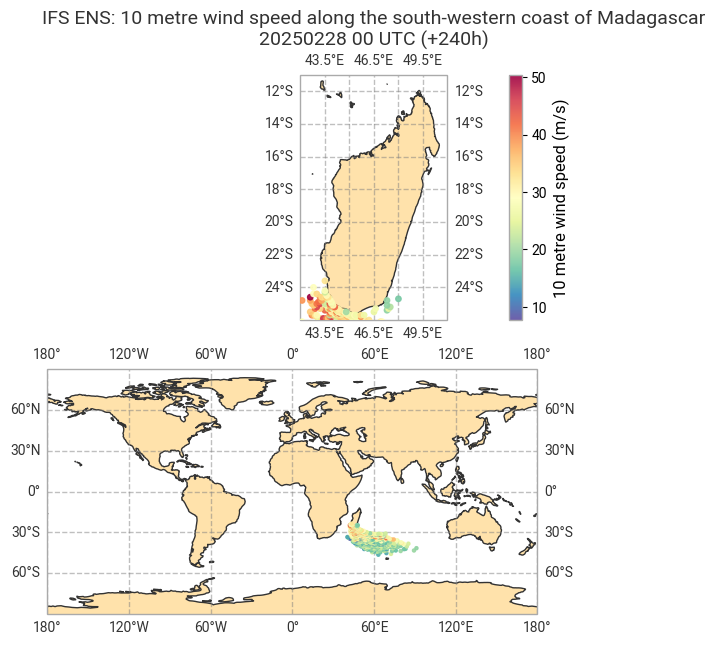

In [62]:
fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': ccrs.PlateCarree()})

ws10 = ax1.scatter(mean_ens["longitude"], mean_ens["latitude"],
            s=15,
            c=mean_ens.windSpeedAt10M,
            marker='o',
            cmap='Spectral_r',
            alpha=0.9,
            edgecolors='face',
            transform = ccrs.PlateCarree(),
            zorder=10)
cbar = fig.colorbar(ws10, ax=ax1, pad=0.1)
cbar.set_label('10 metre wind speed (m/s)', fontsize=12)
ax1.set_title("IFS ENS: 10 metre wind speed along the south-western coast of Madagascar\n"
              f"{DATES[0]} 00 UTC (+{STEPS}h)",
              fontsize=14)
ax1.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax1.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax1.coastlines(color="#333333")
ax1.set_extent([42, 51, -26, -11], crs=ccrs.PlateCarree())

ax2.scatter(mean_ens.longitude, mean_ens.latitude,
            s=5,
            c=mean_ens.windSpeedAt10M,
            marker='o',
            cmap='Spectral_r',
            alpha=0.9,
            edgecolors='face',
            transform = ccrs.PlateCarree(),
            zorder=10)
ax2.add_feature(cfeature.LAND, facecolor="#ffe2ab")
ax2.gridlines(draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
ax2.coastlines(color="#333333")
ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

fig.savefig(f"./plots/ws10_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png", dpi=200, bbox_inches='tight')